In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [3]:
train_data.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


In [4]:
test_data.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,CR_195453,01-FEB-18,0,30,35,7,3,6,4,0,5,1,174,NaN,72,119,23
1,CR_103520,05-MAR-04,0,44,44,1,3,7,1,4,6,1,316,0.0,12,29,34
2,CR_196089,27-JAN-18,0,34,33,3,5,2,7,3,0,1,316,1.0,72,0,34
3,CR_112195,18-AUG-06,7,3,2,3,5,9,8,0,5,1,174,1.0,112,87,34
4,CR_149832,31-OCT-11,0,7,8,7,3,2,7,1,5,1,174,0.0,112,93,43


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   INCIDENT_ID       23856 non-null  object 
 1   DATE              23856 non-null  object 
 2   X_1               23856 non-null  int64  
 3   X_2               23856 non-null  int64  
 4   X_3               23856 non-null  int64  
 5   X_4               23856 non-null  int64  
 6   X_5               23856 non-null  int64  
 7   X_6               23856 non-null  int64  
 8   X_7               23856 non-null  int64  
 9   X_8               23856 non-null  int64  
 10  X_9               23856 non-null  int64  
 11  X_10              23856 non-null  int64  
 12  X_11              23856 non-null  int64  
 13  X_12              23674 non-null  float64
 14  X_13              23856 non-null  int64  
 15  X_14              23856 non-null  int64  
 16  X_15              23856 non-null  int64 

In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15903 entries, 0 to 15902
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   INCIDENT_ID  15903 non-null  object 
 1   DATE         15903 non-null  object 
 2   X_1          15903 non-null  int64  
 3   X_2          15903 non-null  int64  
 4   X_3          15903 non-null  int64  
 5   X_4          15903 non-null  int64  
 6   X_5          15903 non-null  int64  
 7   X_6          15903 non-null  int64  
 8   X_7          15903 non-null  int64  
 9   X_8          15903 non-null  int64  
 10  X_9          15903 non-null  int64  
 11  X_10         15903 non-null  int64  
 12  X_11         15903 non-null  int64  
 13  X_12         15776 non-null  float64
 14  X_13         15903 non-null  int64  
 15  X_14         15903 non-null  int64  
 16  X_15         15903 non-null  int64  
dtypes: float64(1), int64(14), object(2)
memory usage: 2.1+ MB


In [7]:
train_data.describe()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
count,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23674.000000,23856.000000,23856.000000,23856.000000,23856.000000
mean,0.483778,24.791206,24.637450,4.276744,2.455609,6.154175,4.876509,0.972460,4.924128,1.244802,206.954519,0.974064,85.237383,72.674296,33.464747,0.955231
std,1.439738,15.240231,15.135093,2.944672,1.963095,4.471756,3.881931,1.453144,1.362625,1.119301,93.033348,1.167725,27.597226,43.297320,8.386834,0.206800
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,8.000000,2.000000,1.000000,3.000000,2.000000,0.000000,5.000000,1.000000,174.000000,1.000000,72.000000,29.000000,34.000000,1.000000
50%,0.000000,24.000000,24.000000,4.000000,3.000000,5.000000,4.000000,1.000000,5.000000,1.000000,249.000000,1.000000,98.000000,62.000000,34.000000,1.000000
75%,0.000000,36.000000,35.000000,6.000000,5.000000,8.000000,7.000000,1.000000,6.000000,1.000000,249.000000,1.000000,103.000000,107.000000,34.000000,1.000000
max,7.000000,52.000000,52.000000,10.000000,5.000000,19.000000,18.000000,99.000000,6.000000,90.000000,332.000000,90.000000,116.000000,142.000000,50.000000,1.000000


In [8]:
train_data.isnull().sum()

INCIDENT_ID           0
DATE                  0
X_1                   0
X_2                   0
X_3                   0
X_4                   0
X_5                   0
X_6                   0
X_7                   0
X_8                   0
X_9                   0
X_10                  0
X_11                  0
X_12                182
X_13                  0
X_14                  0
X_15                  0
MULTIPLE_OFFENSE      0
dtype: int64

In [9]:
test_data.isnull().sum()

INCIDENT_ID      0
DATE             0
X_1              0
X_2              0
X_3              0
X_4              0
X_5              0
X_6              0
X_7              0
X_8              0
X_9              0
X_10             0
X_11             0
X_12           127
X_13             0
X_14             0
X_15             0
dtype: int64

## We can see that we have some null values .So let's remove these null values

In [10]:
train_data["X_12"] = train_data["X_12"].ffill()
test_data["X_12"] = test_data["X_12"].ffill()
train_data["X_12"] = train_data["X_12"].bfill()
test_data["X_12"] = test_data["X_12"].bfill()

In [11]:
train_data.isnull().sum()

INCIDENT_ID         0
DATE                0
X_1                 0
X_2                 0
X_3                 0
X_4                 0
X_5                 0
X_6                 0
X_7                 0
X_8                 0
X_9                 0
X_10                0
X_11                0
X_12                0
X_13                0
X_14                0
X_15                0
MULTIPLE_OFFENSE    0
dtype: int64

In [12]:
test_data.isnull().sum()

INCIDENT_ID    0
DATE           0
X_1            0
X_2            0
X_3            0
X_4            0
X_5            0
X_6            0
X_7            0
X_8            0
X_9            0
X_10           0
X_11           0
X_12           0
X_13           0
X_14           0
X_15           0
dtype: int64

## Now we can see that, we have no Null Values.So we successfully remove all the Null Values

## Now let's drop the first two column(INCIDENT_ID & DATE) becouse we don't need these two column

In [13]:
train_data.drop(["INCIDENT_ID","DATE"],axis=1,inplace=True)

In [14]:
test_data.drop(["INCIDENT_ID","DATE"],axis=1,inplace=True)

In [15]:
train_data.head()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


In [16]:
test_data.head()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,0,30,35,7,3,6,4,0,5,1,174,0.0,72,119,23
1,0,44,44,1,3,7,1,4,6,1,316,0.0,12,29,34
2,0,34,33,3,5,2,7,3,0,1,316,1.0,72,0,34
3,7,3,2,3,5,9,8,0,5,1,174,1.0,112,87,34
4,0,7,8,7,3,2,7,1,5,1,174,0.0,112,93,43


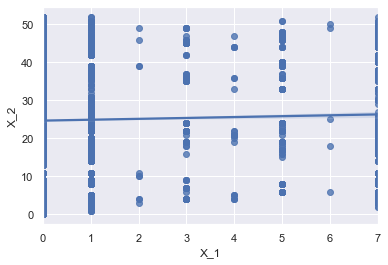

In [17]:
sns.set()
sns.regplot(x='X_1', y='X_2',data=train_data)
plt.show()

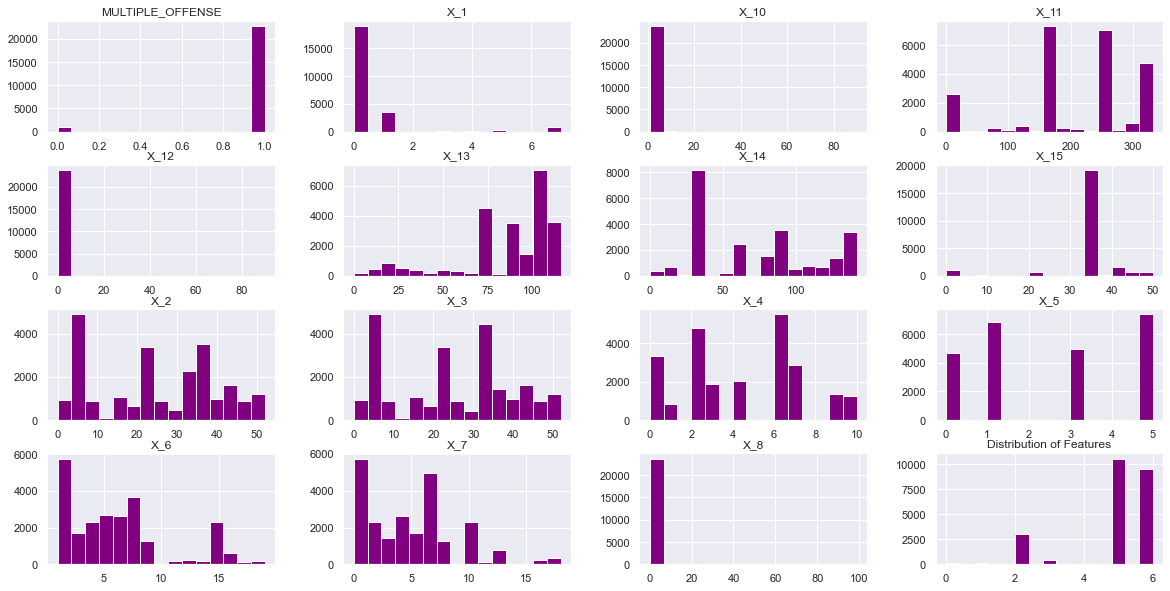

In [18]:
sns.set()
train_data.hist(figsize=(20,10),bins=15,color="purple")
plt.title("Distribution of Features")
plt.show()

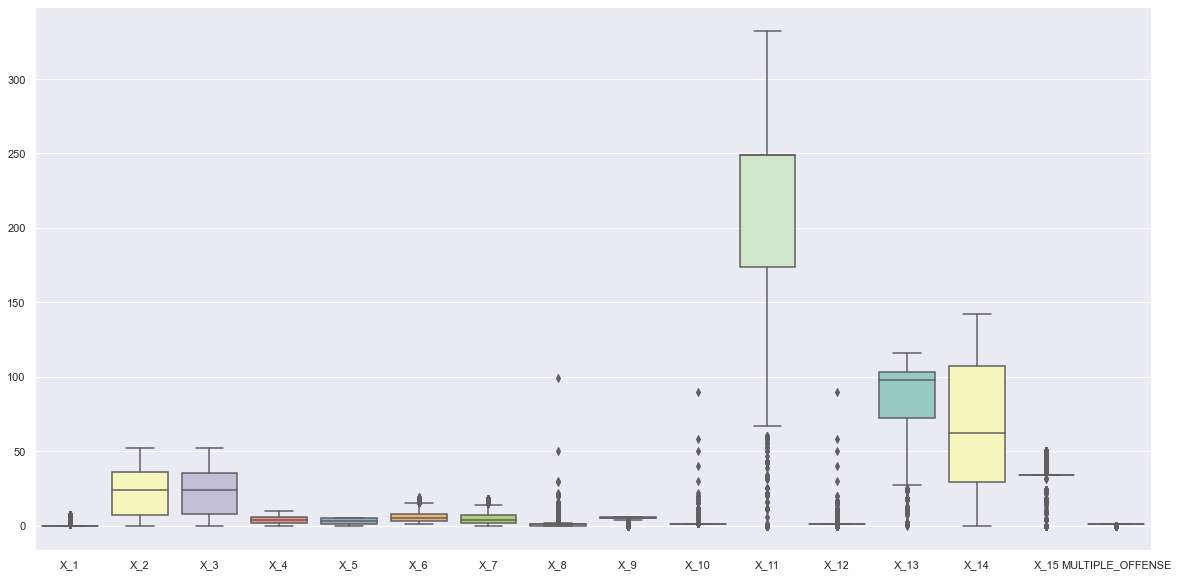

In [19]:
sns.set()
plt.figure(figsize=(20,10))
sns.boxplot(data= train_data,palette = "Set3")
plt.show()

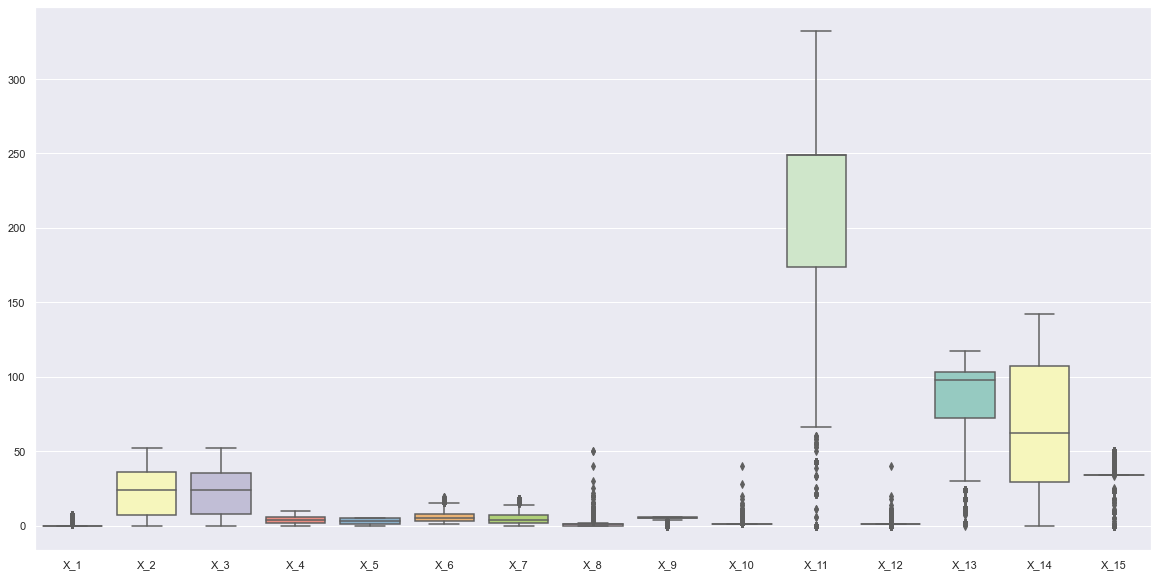

In [20]:
sns.set()
plt.figure(figsize=(20,10))
sns.boxplot(data= test_data,palette = "Set3")
plt.show()

## Here we can see that our dataset has a lot of outliers,Let's remove some of the outliers, becouse outliers are gonna make some trouble for us to create a Good Model

In [21]:
lower_limit = train_data["X_8"].mean() - 3*train_data["X_8"].std()
upper_limit = train_data["X_8"].mean() + 3*train_data["X_8"].std()

In [22]:
df_train1 = train_data[(train_data["X_8"] > lower_limit) & (train_data["X_8"] < upper_limit)]

In [23]:
train_data.shape[0] - df_train1.shape[0]

226

In [24]:
lower_limit = test_data["X_8"].mean() - 3*test_data["X_8"].std()
upper_limit = test_data["X_8"].mean() + 3*test_data["X_8"].std()

In [25]:
df_test1 = test_data[(test_data["X_8"] > lower_limit) & (test_data["X_8"] < upper_limit)]

In [26]:
test_data.shape[0] - df_test1.shape[0]

183

In [27]:
lower_limit = df_train1["X_10"].mean() - 3*df_train1["X_10"].std()
upper_limit = df_train1["X_10"].mean() + 3*df_train1["X_10"].std()

In [28]:
df_train2 = df_train1[(df_train1["X_10"] > lower_limit) & (df_train1["X_10"] < upper_limit)]

In [29]:
df_train1.shape[0] - df_train2.shape[0]

180

In [30]:
lower_limit = df_test1["X_10"].mean() - 3*df_test1["X_10"].std()
upper_limit = df_test1["X_10"].mean() + 3*df_test1["X_10"].std()

In [31]:
df_test2 = df_test1[(df_test1["X_8"] > lower_limit) & (df_test1["X_8"] < upper_limit)]

In [32]:
df_test1.shape[0] - df_test2.shape[0]

412

In [45]:
lower_limit = df_train2["X_11"].mean() - 3*df_train2["X_11"].std()
upper_limit = df_train2["X_11"].mean() + 3*df_train2["X_11"].std()

In [46]:
df_train3 = df_train2[(df_train2["X_11"] > lower_limit) & (df_train2["X_11"] < upper_limit)]

In [47]:
df_train2.shape[0] - df_train3.shape[0]

0

In [48]:
lower_limit = df_test2["X_11"].mean() - 3*df_test2["X_11"].std()
upper_limit = df_test2["X_11"].mean() + 3*df_test2["X_11"].std()

In [49]:
df_test3 = df_test2[(df_test2["X_11"] > lower_limit) & (df_test2["X_11"] < upper_limit)]

In [50]:
df_test2.shape[0] - df_test3.shape[0]

0

In [51]:
lower_limit = df_train3["X_12"].mean() - 3*df_train3["X_12"].std()
upper_limit = df_train3["X_12"].mean() + 3*df_train3["X_12"].std()

In [52]:
df_train4 = df_train3[(df_train3["X_12"] > lower_limit) & (df_train3["X_12"] < upper_limit)]

In [53]:
df_train3.shape[0] - df_train4.shape[0]

614

In [54]:
lower_limit = df_test3["X_12"].mean() - 3*df_test3["X_12"].std()
upper_limit = df_test3["X_12"].mean() + 3*df_test3["X_12"].std()

In [55]:
df_test4 = df_test3[(df_test3["X_12"] > lower_limit) & (df_test3["X_12"] < upper_limit)]

In [56]:
df_test3.shape[0] - df_test4.shape[0]

161

In [60]:
lower_limit = df_train4["X_13"].mean() - 3*df_train4["X_13"].std()
upper_limit = df_train4["X_13"].mean() + 3*df_train4["X_13"].std()

In [61]:
df_train5 = df_train4[(df_train4["X_13"] > lower_limit) & (df_train4["X_13"] < upper_limit)]

In [62]:
df_train4.shape[0] - df_train5.shape[0]

208

In [63]:
lower_limit = df_test4["X_13"].mean() - 3*df_test4["X_13"].std()
upper_limit = df_test4["X_13"].mean() + 3*df_test4["X_13"].std()

In [64]:
df_test5 = df_test4[(df_test4["X_13"] > lower_limit) & (df_test4["X_13"] < upper_limit)]

In [65]:
df_test4.shape[0] - df_test5.shape[0]

166

In [66]:
df_train5.head()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


In [67]:
df_test5.head()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,0,30,35,7,3,6,4,0,5,1,174,0.0,72,119,23
2,0,34,33,3,5,2,7,3,0,1,316,1.0,72,0,34
3,7,3,2,3,5,9,8,0,5,1,174,1.0,112,87,34
4,0,7,8,7,3,2,7,1,5,1,174,0.0,112,93,43
5,0,47,48,7,3,4,2,1,6,1,0,0.0,34,29,34


In [68]:
df_train5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22628 entries, 0 to 23855
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   X_1               22628 non-null  int64  
 1   X_2               22628 non-null  int64  
 2   X_3               22628 non-null  int64  
 3   X_4               22628 non-null  int64  
 4   X_5               22628 non-null  int64  
 5   X_6               22628 non-null  int64  
 6   X_7               22628 non-null  int64  
 7   X_8               22628 non-null  int64  
 8   X_9               22628 non-null  int64  
 9   X_10              22628 non-null  int64  
 10  X_11              22628 non-null  int64  
 11  X_12              22628 non-null  float64
 12  X_13              22628 non-null  int64  
 13  X_14              22628 non-null  int64  
 14  X_15              22628 non-null  int64  
 15  MULTIPLE_OFFENSE  22628 non-null  int64  
dtypes: float64(1), int64(15)
memory usage: 2

## Let's see  our Dataset has any null values or not

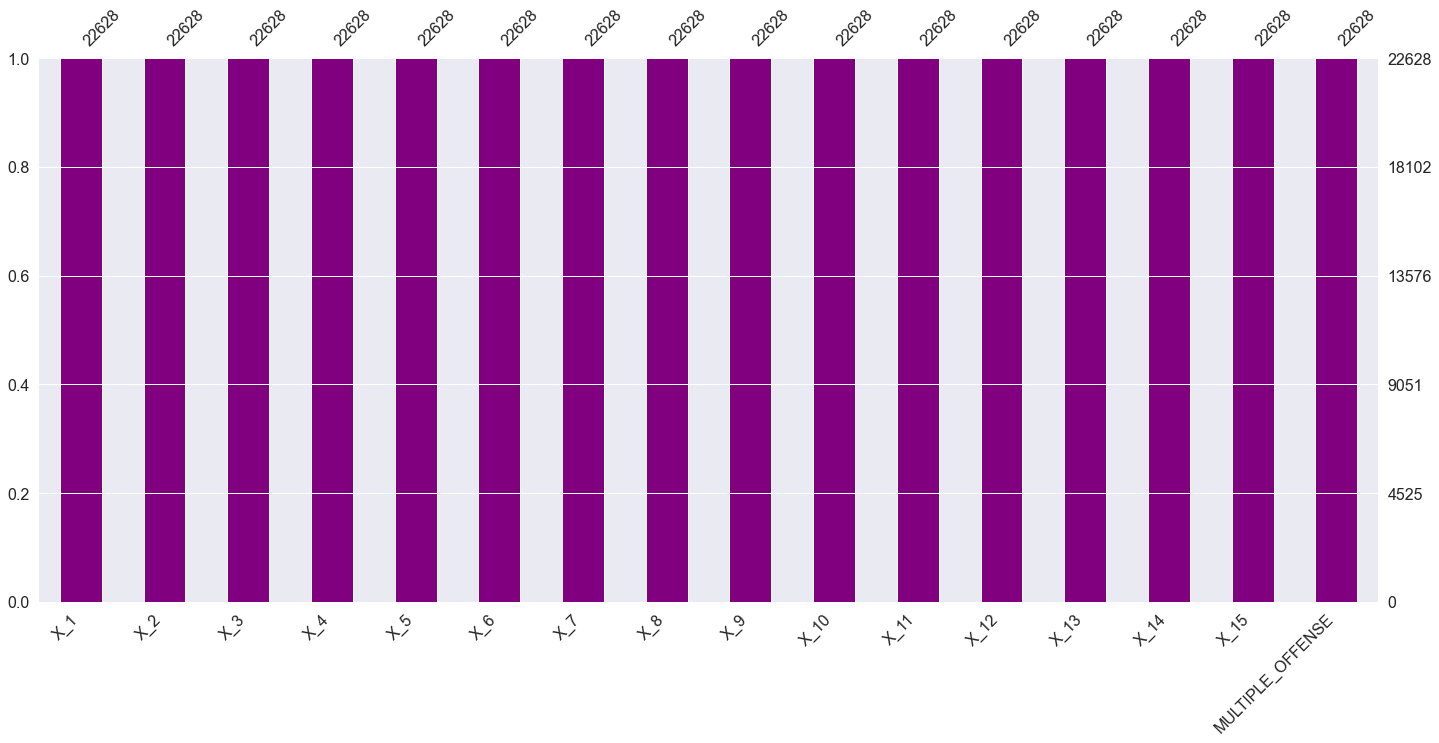

In [72]:
n = msno.bar(df_train5,color="purple")

## So we can see that our Dataset has no Null Values

In [69]:
x = df_train5.drop("MULTIPLE_OFFENSE",axis=1)
y = df_train5["MULTIPLE_OFFENSE"]


## So ,let's now scale our Dataset

In [70]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [71]:
x

array([[0.        , 0.69230769, 0.65384615, ..., 0.77981651, 0.20422535,
        0.72      ],
       [0.14285714, 0.71153846, 0.71153846, ..., 0.88073394, 1.        ,
        0.68      ],
       [0.        , 0.05769231, 0.03846154, ..., 0.94495413, 0.65492958,
        0.68      ],
       ...,
       [0.        , 0.48076923, 0.48076923, ..., 0.02752294, 0.20422535,
        0.36      ],
       [0.        , 0.75      , 0.75      , ..., 0.96330275, 0.72535211,
        0.86      ],
       [1.        , 0.69230769, 0.65384615, ..., 0.77981651, 0.20422535,
        0.68      ]])

## Now the precious time has come to see which parameter is best to create a Good Model

In [73]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [74]:
model_params ={
    "svm": {
        "model" : SVC(gamma="auto"),
        "params": {
            "C" : [1,10,20],
            "kernel": ["rbf"],
            "random_state":[0,10,100]
        }
    },
    
    "decision_tree":{
        "model": DecisionTreeClassifier(),
        "params":{
            "criterion": ["entropy","gini"],
            "max_depth": [5,8,9],
            "random_state":[0,10,100]
        }
    },
    "random_forest":{
        "model": RandomForestClassifier(),
        "params": {
            "n_estimators" : [1,5,10],
            "max_depth" : [5,8,9],
            "random_state":[0,10,100]
        }
    },
    "naive_bayes":{
        "model": GaussianNB(),
        "params": {}
    },
    
    "logistic_regression":{
        "model" : LogisticRegression(solver='liblinear',multi_class = 'auto'),
        "params":{
            "C" : [1,5,10],
            "random_state":[0,10,100]
        }
    },
    "knn" : {
        "model" : KNeighborsClassifier(),
        "params": {
            "n_neighbors" : [5,12,13]
        }
    }
    
    
}

In [75]:
scores =[]
for model_name,mp in model_params.items():
    clf = GridSearchCV(mp["model"],mp["params"],cv=12,return_train_score=False)
    clf.fit(x,y)
    scores.append({
        "Model" : model_name,
        "Best_Score": clf.best_score_,
        "Best_Params": clf.best_params_
    })

In [76]:
result_score = pd.DataFrame(scores, columns = ["Model","Best_Score","Best_Params"])

In [77]:
result_score

,Model,Best_Score,Best_Params
0,svm,0.982014,"{'C': 10, 'kernel': 'rbf', 'random_state': 0}"
1,decision_tree,0.998719,"{'criterion': 'gini', 'max_depth': 9, 'random_..."
2,random_forest,0.991206,"{'max_depth': 9, 'n_estimators': 10, 'random_s..."
3,naive_bayes,0.913338,{}
4,logistic_regression,0.964336,"{'C': 1, 'random_state': 0}"
5,knn,0.971716,{'n_neighbors': 5}


## Wow, we can see that "Random Forest" & "Decision Tree" gives us almost 99% Accuracy

In [79]:
from sklearn.model_selection import  train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [81]:
clf_dt = DecisionTreeClassifier(criterion= "gini",max_depth = 9,random_state=0)

In [82]:
clf_dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [83]:
y_pred = clf_dt.predict(x_test)

In [84]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9996464557185788

## Let's see our Actual vs Predicted Values,Which says,if a server will a Hack or Not

In [85]:
result = pd.DataFrame({"Actual_Value": y_test, "Predicted_Value": y_pred})
result

,Actual_Value,Predicted_Value
4217,1,1
1864,1,1
2313,1,1
8023,1,1
14440,1,1
...,...,...
19612,1,1
1393,1,1
23677,1,1
376,1,1
